In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

paragraph = """Technology is evolving rapidly and changing the way we live and work. Artificial Intelligence, Cloud Computing, and the Internet of Things are transforming industries.
From healthcare to transportation, innovations are everywhere. Smartphones, smart homes, and smart cities are now part of daily life. The pace of digital transformation is unprecedented."""


lowercase_text = re.sub(r'[^\w\s]', '', paragraph.lower())


words = word_tokenize(lowercase_text)
sentences = sent_tokenize(paragraph)


split_words = lowercase_text.split()
print("split():", split_words)
print("word_tokenize():", words)


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]


freq_dist = Counter(filtered_words)
print("Word Frequency (without stopwords):")
print(freq_dist)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


split(): ['technology', 'is', 'evolving', 'rapidly', 'and', 'changing', 'the', 'way', 'we', 'live', 'and', 'work', 'artificial', 'intelligence', 'cloud', 'computing', 'and', 'the', 'internet', 'of', 'things', 'are', 'transforming', 'industries', 'from', 'healthcare', 'to', 'transportation', 'innovations', 'are', 'everywhere', 'smartphones', 'smart', 'homes', 'and', 'smart', 'cities', 'are', 'now', 'part', 'of', 'daily', 'life', 'the', 'pace', 'of', 'digital', 'transformation', 'is', 'unprecedented']
word_tokenize(): ['technology', 'is', 'evolving', 'rapidly', 'and', 'changing', 'the', 'way', 'we', 'live', 'and', 'work', 'artificial', 'intelligence', 'cloud', 'computing', 'and', 'the', 'internet', 'of', 'things', 'are', 'transforming', 'industries', 'from', 'healthcare', 'to', 'transportation', 'innovations', 'are', 'everywhere', 'smartphones', 'smart', 'homes', 'and', 'smart', 'cities', 'are', 'now', 'part', 'of', 'daily', 'life', 'the', 'pace', 'of', 'digital', 'transformation', 'is',

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Words with only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', lowercase_text)

# 2. Remove stopwords
filtered_alpha = [w for w in alpha_words if w not in stop_words]

# 3. Stemming
ps = PorterStemmer()
stemmed = [ps.stem(w) for w in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_alpha]

# 5. Comparison
print("Stemmed Words:\n", stemmed)
print("Lemmatized Words:\n", lemmatized)

# Explanation:
print("\nStemming is faster but less accurate, lemmatization is more linguistically correct. Prefer lemmatization for high-quality NLP tasks.")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemmed Words:
 ['technolog', 'evolv', 'rapidli', 'chang', 'way', 'live', 'work', 'artifici', 'intellig', 'cloud', 'comput', 'internet', 'thing', 'transform', 'industri', 'healthcar', 'transport', 'innov', 'everywher', 'smartphon', 'smart', 'home', 'smart', 'citi', 'part', 'daili', 'life', 'pace', 'digit', 'transform', 'unpreced']
Lemmatized Words:
 ['technology', 'evolving', 'rapidly', 'changing', 'way', 'live', 'work', 'artificial', 'intelligence', 'cloud', 'computing', 'internet', 'thing', 'transforming', 'industry', 'healthcare', 'transportation', 'innovation', 'everywhere', 'smartphones', 'smart', 'home', 'smart', 'city', 'part', 'daily', 'life', 'pace', 'digital', 'transformation', 'unprecedented']

Stemming is faster but less accurate, lemmatization is more linguistically correct. Prefer lemmatization for high-quality NLP tasks.


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The new iPhone has a better camera and battery life.",
    "Samsung released a new foldable phone with unique features.",
    "Google Pixel phones are known for their clean software experience."
]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("Bag of Words:\n", bow.toarray())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()

# 3. Top 3 keywords per text
import numpy as np

for i, text in enumerate(texts):
    print(f"\nText {i+1}: {text}")
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[-3:][::-1]
    top_keywords = [(feature_names[idx], row[idx]) for idx in top_indices]
    print("Top 3 TF-IDF keywords:", top_keywords)


Bag of Words:
 [[1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1]
 [0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0]]

Text 1: The new iPhone has a better camera and battery life.
Top 3 TF-IDF keywords: [('the', np.float64(0.3414262179382391)), ('life', np.float64(0.3414262179382391)), ('camera', np.float64(0.3414262179382391))]

Text 2: Samsung released a new foldable phone with unique features.
Top 3 TF-IDF keywords: [('with', np.float64(0.3632547094545769)), ('unique', np.float64(0.3632547094545769)), ('samsung', np.float64(0.3632547094545769))]

Text 3: Google Pixel phones are known for their clean software experience.
Top 3 TF-IDF keywords: [('software', np.float64(0.31622776601683794)), ('their', np.float64(0.31622776601683794)), ('phones', np.float64(0.31622776601683794))]


In [7]:
text1 = """Artificial Intelligence enables machines to think and learn like humans."""
text2 = """Blockchain is a decentralized ledger technology ensuring secure transactions."""

# Preprocessing
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(text.split())

# 1. Jaccard Similarity
set1 = preprocess(text1)
set2 = preprocess(text2)
jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard_sim)

# 2. Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", cosine_sim[0][0])

# 3. Analysis
print("\nCosine Similarity captures vector magnitude and is better for semantic comparison than Jaccard in most NLP tasks.")


Jaccard Similarity: 0.0
Cosine Similarity: 0.0

Cosine Similarity captures vector magnitude and is better for semantic comparison than Jaccard in most NLP tasks.



Review: This phone has amazing battery life and performance.
Polarity: 0.6000000000000001, Subjectivity: 0.9
Sentiment: Positive

Review: The delivery was late and the packaging was damaged.
Polarity: -0.3, Subjectivity: 0.6
Sentiment: Negative

Review: Overall, it's an average product. Not too bad, not too great.
Polarity: -0.012499999999999956, Subjectivity: 0.45416666666666666
Sentiment: Negative


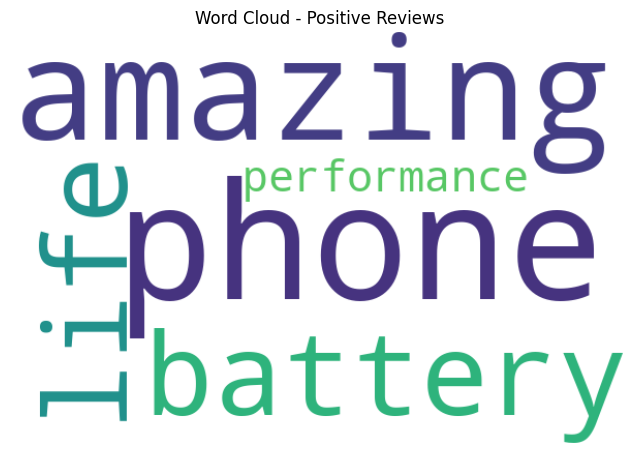

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This phone has amazing battery life and performance.",
    "The delivery was late and the packaging was damaged.",
    "Overall, it's an average product. Not too bad, not too great."
]

# 1. Sentiment Analysis
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"\nReview: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}\nSentiment: {sentiment}")

# 2. Word Cloud for Positive Reviews
positive_text = ' '.join([r for r in reviews if TextBlob(r).sentiment.polarity > 0])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


Review: This phone has amazing battery life and performance.
Polarity: 0.6000000000000001, Subjectivity: 0.9
Sentiment: Positive

Review: The delivery was late and the packaging was damaged.
Polarity: -0.3, Subjectivity: 0.6
Sentiment: Negative

Review: Overall, it's an average product. Not too bad, not too great.
Polarity: -0.012499999999999956, Subjectivity: 0.45416666666666666
Sentiment: Negative


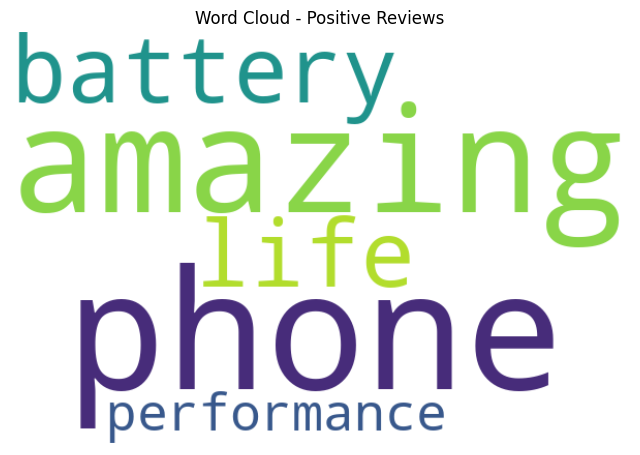

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This phone has amazing battery life and performance.",
    "The delivery was late and the packaging was damaged.",
    "Overall, it's an average product. Not too bad, not too great."
]

# 1. Sentiment Analysis
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"\nReview: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}\nSentiment: {sentiment}")

# 2. Word Cloud for Positive Reviews
positive_text = ' '.join([r for r in reviews if TextBlob(r).sentiment.polarity > 0])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()